----
# Laboratorium 10 - Filtry analogowe, część 2

----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib`, `imageio` oraz `scipy.signal`.
### 0.2. Przypomnienie wiadomości o filtrach analogowych
### 0.3. Moduł transmitancji i tłumienie
### 0.4. Gabaryty filtru
### 0.5. Aproksymacje Butterwortha, Czebyszewa (1 i 2 rodzaju) i Cauera (eliptyczna)
### 0.6  Gabaryty filtrów pasmowo-przepustowych i pasmowo zaporowych

# 0.7 FUNKCJA DO PROJEKTOWANIA FILTRÓW I WYSWIETLANIA ICH CHARAKTERYSTYKI AMPLITUDOWEJ Z POPRZEDNICH ZAJEĆ


In [40]:
%matplotlib inline
import sympy 
import scipy.signal 
import numpy as np
import matplotlib.pyplot as plt 
defFigSize = [18,8]

----
Do poniższego bloku wklej zadanie 5 (funkcja do projektowania i wyświetlania filtru o zadanych gabarytach). Funkcja ta będzie potrzebna do wykonania ćwiczenia) 

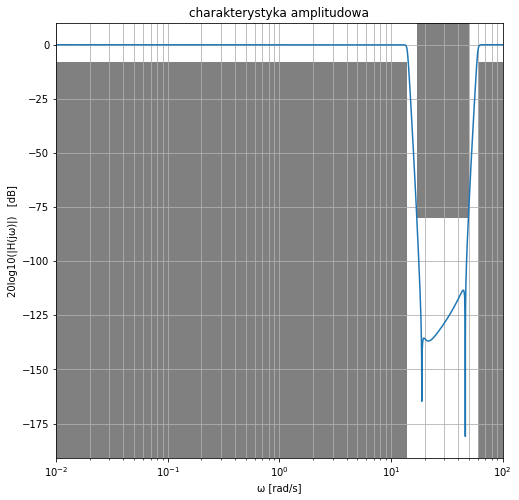

In [41]:
def designFilter(charType =  'butt',type = 'low', wp = 3,ws = 8, gpass = 3, gstop = 80, w_min =-2, w_max=2) : 
    #find order and design filter
    if charType == 'butt' : 
         n, w_n_butt = scipy.signal.buttord (wp,ws,gpass,gstop, analog=True)
         B,A =scipy.signal.butter(N = n,Wn = wp, btype=type, analog=True, output='ba') 
    elif charType == 'cheby1' : 
        n, w_n_butt = scipy.signal.cheb1ord (wp,ws,gpass,gstop, analog=True)
        B, A = scipy.signal.cheby1(N = n,rp=gpass ,Wn = wp, btype=type, analog=True, output='ba') 
    elif charType == 'cheby2' : 
        n, w_n_butt = scipy.signal.cheb2ord (wp,ws,gpass,gstop, analog=True)
        B, A = scipy.signal.cheby2(N = n,rs=gstop ,Wn = ws, btype=type, analog=True, output='ba') 
    elif charType == 'ellip' : 
        n, w_n_butt = scipy.signal.ellipord (wp,ws,gpass,gstop, analog=True)
        B, A = scipy.signal.ellip(N = n,rp=gpass,rs=gstop  ,Wn = wp, btype=type, analog=True, output='ba') 
    else :  
        print("Type not found!!!")
        return
    #display characteristics
    w = np.logspace(w_min,w_max,10000)
    H = scipy.signal.freqs(B, A, w)[1]
    M = 20*np.log10(np.abs(H,dtype = np.double)) 
    
    #plt.figure(figsize=defFigSize)
    plt.semilogx(w, M,label= charType + ", rząd filtru: %d"%(n))
    plt.title("charakterystyka amplitudowa")
    plt.xlabel("ω [rad/s]")
    plt.ylabel("20log10(|H(jω)|)   [dB]")
    plt.grid(which='both', axis='both')
    if type == 'low' or type == 'lowpass': 
        plt.fill([w[0], w[0],  wp   ,  wp   ], [np.min(M)-10, -gpass, -gpass, np.min(M)-10], '0.5', lw=0) # pass
        plt.fill([ws  , ws  ,  w[-1],  w[-1]], [np.max(M)+10, -gstop, -gstop, np.max(M)+10], '0.5', lw=0) # stop
    if type == 'high' or type == 'highpass': 
        plt.fill([w[0], w[0],  ws   ,  ws   ], [np.max(M)+10, -gstop, -gstop, np.max(M)+10], '0.5', lw=0) # stop
        plt.fill([wp  , wp  ,  w[-1],  w[-1]], [np.min(M)-10, -gpass, -gpass, np.min(M)-10], '0.5', lw=0) # pass
    if type == 'bandpass': 
        plt.fill([w[0] ,  w[0],  ws[0], ws[0]], [np.max(M)+10, -gstop, -gstop, np.max(M)+10], '0.5', lw=0) # stop
        plt.fill([wp[0], wp[0],  wp[1], wp[1]], [np.min(M)-10, -gpass, -gpass, np.min(M)-10], '0.5', lw=0) # pass
        plt.fill([ws[1], ws[1],  w[-1], w[-1]], [np.max(M)+10, -gstop, -gstop, np.max(M)+10], '0.5', lw=0) # stop
    if type == 'bandstop':
        plt.fill([w[0] ,  w[0],  wp[0], wp[0]], [np.min(M)-10, -gpass, -gpass, np.min(M)-10], '0.5', lw=0) # pass
        plt.fill([ws[0], ws[0],  ws[1], ws[1]], [np.max(M)+10, -gstop, -gstop, np.max(M)+10], '0.5', lw=0) # stop
        plt.fill([wp[1], wp[1],  w[-1], w[-1]], [np.min(M)-10, -gpass, -gpass, np.min(M)-10], '0.5', lw=0) # pass
    plt.axis([w[0],w[-1], np.min(M)-10, np.max(M)+10])

#usege example
plt.figure(figsize=[8,8])
designFilter('butt',type = 'bandstop',wp = [14, 60],ws = [17, 50], gpass = 8, gstop = 80)

----
###Wskazówki dla prowadzącego 
- Przed pierwszym zadaniem warto rozrysowć gabaryty (dla tłumienia i charakterystyki amplitudowej) filtrów pasmowych

----  
### Zadanie 1 
Zaprojektuj filtr pasmowo przepustowy sepłnające następujące gabaryty:   
    - pasmo przepustowe dla pulsacji w zakresie wp1  = 3 rad/s  : wp2= 4 rad/s,  
    - pasmo zaporowe dla pulsacji: ws1 = 1rad/s,   oraz ws2 = 8 rad/s
    - dopuszczalne tłumienie w paśmi przepustowym:  3dB  
    - minimalne tłumienie w paśmie zaporowym: 50dB   

Zadanie wykonaj dla 4 aproksymacji, Butterwortha, Czebyszewa typu 1 i 2 oar Eliptyczneej. 

Podpowiedz:  
    - funkcję `scipy.signal.butter`, `scipy.signal.cheby1`, `scipy.signal.cheby2`, `scipy.signal.ellip`, wykorzystuje się tak samo. Zamiast wartości skalarnych dla granicy pasm zaporowego i przepustowego należy podać wektory z granicami pasm zaporowych oraz przedziałęm pasma przepustowego (w kolejności rosnącej). Wystarczy więc podać wektory zamiast skalarów na wejscie funkcji

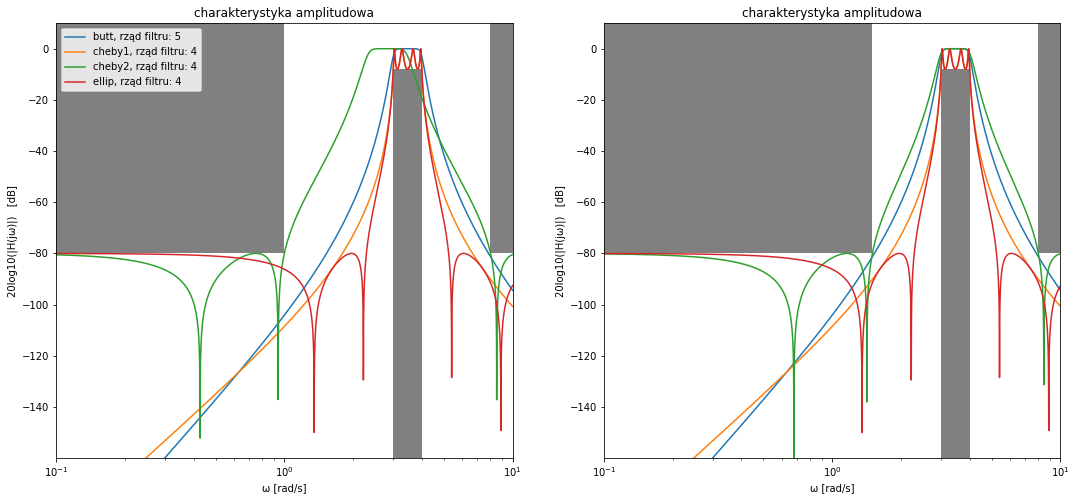

In [42]:
plt.figure(figsize=defFigSize)
plt.subplot(1,2,1)
#design and display filters
#Butterworht
designFilter('butt',type = 'bandpass',wp = [3, 4],ws = [1, 8], gpass = 8, gstop = 80, w_min =-1, w_max=1)
#Cheby1
designFilter('cheby1',type = 'bandpass',wp = [3, 4],ws = [1, 8], gpass = 8, gstop = 80, w_min =-1, w_max=1)
#cheby2
designFilter('cheby2',type = 'bandpass',wp = [3, 4],ws = [1, 8], gpass = 8, gstop = 80, w_min =-1, w_max=1)
#Ellip
designFilter('ellip',type = 'bandpass',wp = [3, 4],ws = [1, 8], gpass = 8, gstop = 80, w_min =-1, w_max=1)
plt.legend()
#design and display filters
plt.subplot(1,2,2)
#Butterworht
designFilter('butt',type = 'bandpass',wp = [3, 4],ws = [1.5, 8], gpass = 8, gstop = 80, w_min =-1, w_max=1)
#Cheby1
designFilter('cheby1',type = 'bandpass',wp = [3, 4],ws = [1.5, 8], gpass = 8, gstop = 80, w_min =-1, w_max=1)
#cheby2
designFilter('cheby2',type = 'bandpass',wp = [3, 4],ws = [1.5, 8], gpass = 8, gstop = 80, w_min =-1, w_max=1)
#Ellip
designFilter('ellip',type = 'bandpass',wp = [3, 4],ws = [1.5, 8], gpass = 8, gstop = 80, w_min =-1, w_max=1)

----  
### Zadanie 2 
Zaprojektuj filtr pasmowo zaporowy sepłnające następujące gabaryty:   
    - pasmo przepustowe dla pulsacji w zakresie wp1  = 1 rad/s  : wp2= 8 rad/s,  
    - pasmo zaporowe dla pulsacji: ws1 = 3rad/s,   oraz ws2 = 4 rad/s
    - dopuszczalne tłumienie w paśmi przepustowym:  3dB  
    - minimalne tłumienie w paśmie zaporowym: 50dB   

Zadanie wykonaj dla 4 aproksymacji, Butterwortha, Czebyszewa typu 1 i 2 oar Eliptyczneej. 

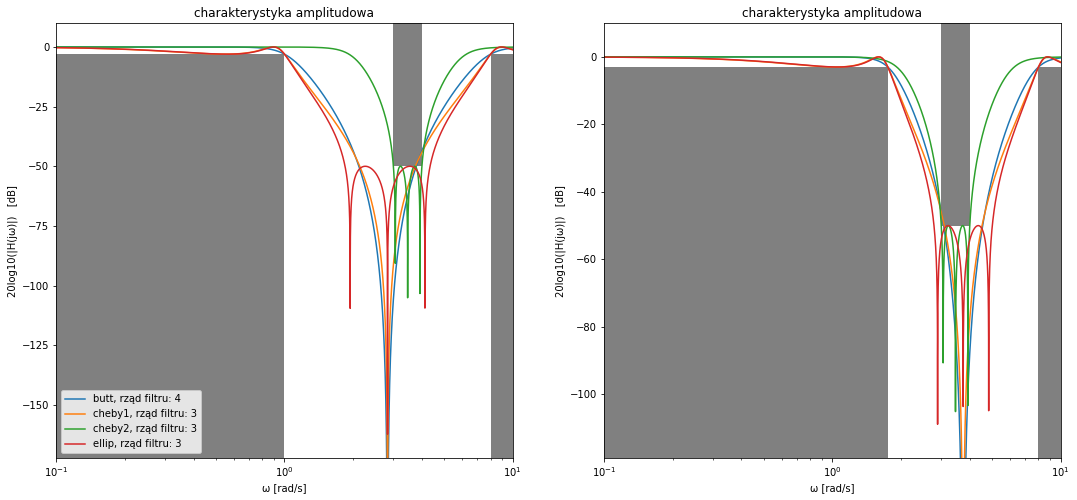

In [43]:
plt.figure(figsize=defFigSize)
plt.subplot(1,2,1)
#design and display filters
#Butterworht
designFilter('butt',type = 'bandstop',wp = [1, 8],ws = [3, 4], gpass = 3, gstop = 50, w_min =-1, w_max=1)
#Cheby1
designFilter('cheby1',type = 'bandstop',wp = [1, 8],ws = [3, 4], gpass = 3, gstop = 50, w_min =-1, w_max=1)
#cheby2
designFilter('cheby2',type = 'bandstop',wp = [1, 8],ws = [3, 4], gpass = 3, gstop = 50, w_min =-1, w_max=1)
#Ellip
designFilter('ellip',type = 'bandstop',wp = [1, 8],ws = [3, 4], gpass = 3, gstop = 50, w_min =-1, w_max=1)
plt.legend()
#design and display filters
plt.subplot(1,2,2)
#Butterworht
designFilter('butt',type = 'bandstop',wp = [1.75, 8],ws = [3, 4], gpass = 3, gstop = 50, w_min =-1, w_max=1)
#Cheby1
designFilter('cheby1',type = 'bandstop',wp = [1.75, 8],ws = [3, 4], gpass = 3, gstop = 50, w_min =-1, w_max=1)
#cheby2
designFilter('cheby2',type = 'bandstop',wp = [1.75, 8],ws = [3, 4], gpass = 3, gstop = 50, w_min =-1, w_max=1)
#Ellip
designFilter('ellip',type = 'bandstop',wp = [1.75, 8],ws = [3, 4], gpass = 3, gstop = 50, w_min =-1, w_max=1)

----

In [44]:
import ipywidgets

class elitIny : 
    def __init__(self,fOrder,W_p,fType) :
        self.filterOrder = fOrder
        self.Wp          = W_p
        self.filterType  = fType
        self.figSize     = [8,8]

    def ellipInteractive(self,w_min,w_max) :
        if (w_min >=  w_max) :
            print("w_min > w_max")
            return  
        B, A = scipy.signal.ellip(N = self.filterOrder,rp=3,rs=30  ,Wn = self.Wp, btype=self.filterType, analog=True, output='ba') 
        #display characteristics
        plt.figure(figsize=self.figSize)
        w = np.logspace(np.log10(w_min),np.log10(w_max),10000)
        H = scipy.signal.freqs(B, A, w)[1]
        M = 20*np.log10(np.abs(H,dtype = np.double)) 
        #display figure
        plt.figure(figsize=defFigSize)
        plt.semilogx(w, M,label= "elip, rząd filtru: %d"%(self.filterOrder))
        plt.title("charakterystyka amplitudowa")
        plt.xlabel("ω [rad/s]")
        plt.ylabel("20log10(|H(jω)|)   [dB]")
        plt.grid()
        plt.show()
    
    def createDemo(self, FigSize=(12, 8)):
        self.figSize = FigSize
        return ipywidgets.interactive(elipInter.ellipInteractive, w_min=ipywidgets.FloatLogSlider(value=0.01,
                                                                                          base=10,
                                                                                          min=-2, # max exponent of base
                                                                                          max=2, # min exponent of base
                                                                                          step=0.1, # exponent step
                                                                                          description='w_min'),
                                                          w_max=ipywidgets.FloatLogSlider(value=100,
                                                                                          base=10,
                                                                                          min=-2, # max exponent of base
                                                                                          max=2, # min exponent of base
                                                                                          step=0.01, # exponent step
                                                                                          description='w_max'))


----  
### Zadanie 3
Sprawdź, ile zer transmisji i ile zer tłumienia mają następujące filtry o aproksymacji eliptycznej. Dla jakich wartości pulsacji występują te miejsca charakterystyczne? Proszę przyjąć αp = 3dB, αs = 30dB.  
- a) filtr dolnoprzepustowy o pulsacji granicznej 10 rad/s o stopniu 5
- b) filtr dolnoprzepustowy o pulsacji granicznej 10 rad/s o stopniu 6
- c) filtr pasmowozaporowy o pulsacajach granicznych pasma przepustowego 3 rad/s i 5 rad/s. Stopień dolnoprzepustowego filtru prototypowego wynosi 5.
- d) filtr pasmowozaporowy o pulsacajach granicznych pasma przepustowego 3 rad/s i 5 rad/s. Stopień dolnoprzepustowego filtru prototypowego wynosi 6

In [55]:
w_min = 0.01
w_max = 100
fOrder  = 5
W_p     = [3, 5]
fType   =  'bandstop'

elipInter = elitIny(fOrder,W_p,fType)

Demo = elipInter.createDemo(defFigSize)

Demo




interactive(children=(FloatLogSlider(value=0.01, description='w_min', max=2.0, min=-2.0), FloatLogSlider(value…